Rewriting as SPD:

To make the matrix Symmetric Positive Definite (SPD): - Multiply both sides by -1: $$ -y''(x) - y(x) = 0, \quad y(0) = 1,\ y\left(\frac{\pi}{2}\right) = 2 $$ - The discretized matrix becomes SPD when \( 2 < h^2 \). Resulting system matrix \( A \): $$ A = \begin{pmatrix} 2-h^2 & -1 & 0 & \dots & 0 \\ -1 & 2-h^2 & -1 & \dots & 0 \\ 0 & -1 & 2-h^2 & \dots & 0 \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & 0 & \dots & 2-h^2 \end{pmatrix} $$ Modified right-hand side vector \( F' \): $$ F' = \begin{pmatrix} 1 \\ 0 \\ 0 \\ \vdots \\ 2 \end{pmatrix} $$

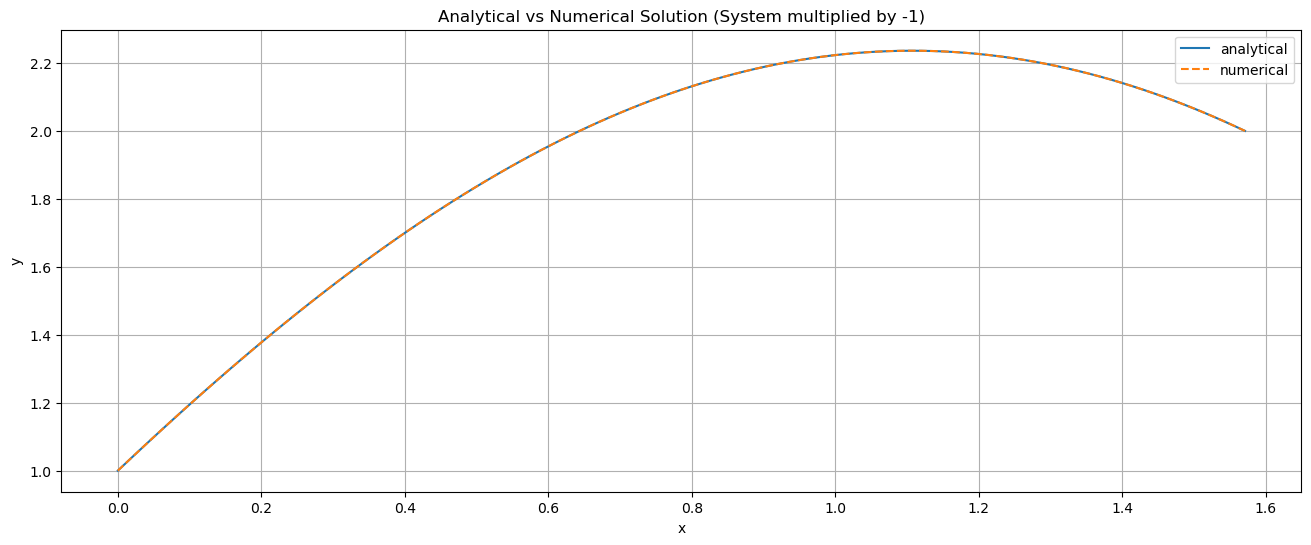

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def cg(A, b, x_cg=None, maxit=1000):
    if x_cg is None:
        x_cg = np.zeros_like(b)
    rk = b - np.dot(A, x_cg)
    p = rk.copy()
    for k in range(maxit):
        Ap = np.dot(A, p)
        rk_dot = np.dot(rk, rk)
        alpha = rk_dot / np.dot(p, Ap)
        x_cg = x_cg + alpha * p
        rkp1 = rk - alpha * Ap
        beta = np.dot(rkp1, rkp1) / rk_dot
        p = rkp1 + beta * p
        rk = rkp1
        if np.linalg.norm(rk) < 1e-10:
            break
    return x_cg

def ComputeAnalyticalSolution(N, leftbc, rightbc):
    x = np.linspace(0, (pi / 2), N + 2)
    y = np.cos(x) + 2 * np.sin(x)
    return x, y

def ComputeNumericalSolution(N, leftbc, rightbc):
    h = (pi / 2) / (N + 1)
    x = np.linspace(0, (pi / 2), N + 2)
    A = np.zeros((N, N))
    F = np.zeros(N)
    # Multiply the system by -1: change signs in A and F
    A[0, 0] = 2 - h**2
    A[0, 1] = -1
    F[0] = leftbc
    for i in range(1, N - 1):
        A[i, i - 1] = -1
        A[i, i] = 2 - h**2
        A[i, i + 1] = -1
        F[i] = 0
    A[N - 1, N - 2] = -1
    A[N - 1, N - 1] = 2 - h**2
    F[N - 1] = rightbc
    y_h_int = cg(A, F)
    y_h = np.zeros(N + 2)
    y_h[0] = leftbc
    y_h[1:N + 1] = y_h_int
    y_h[-1] = rightbc
    return x, y_h, h

leftbc = 1
rightbc = 2
N = 100
x, y = ComputeAnalyticalSolution(N, leftbc, rightbc)
x_h, y_h, h = ComputeNumericalSolution(N, leftbc, rightbc)
plt.figure(figsize=(16, 6))
plt.plot(x, y, label='analytical')
plt.plot(x_h, y_h, label='numerical', linestyle='--')
plt.title('Analytical vs Numerical Solution (System multiplied by -1)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

N=3 seems to show quite good approximation. 


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def jacobi(A, b, x0=None, maxit=1000, tol=1e-10):
    D = np.diag(A)
    R = A - np.diagflat(D)
    x = x0.copy()
    for i in range(maxit):
        x_new = (b - np.dot(R, x)) / D
        if np.linalg.norm(x_new - x) < tol:
            return x_new, i+1
        x = x_new
    return x, maxit

def cg(A, b, x_cg=None, maxit=1000, tol=1e-10):
    if x_cg is None:
        x_cg = np.zeros_like(b)
    rk = b - np.dot(A, x_cg)
    p = rk.copy()
    for k in range(maxit):
        Ap = np.dot(A, p)
        rk_dot = np.dot(rk, rk)
        alpha = rk_dot / np.dot(p, Ap)
        x_cg = x_cg + alpha * p
        rkp1 = rk - alpha * Ap
        beta = np.dot(rkp1, rkp1) / rk_dot
        p = rkp1 + beta * p
        rk = rkp1
        if np.linalg.norm(rk) < tol:
            return x_cg, k+1
    return x_cg, maxit

# System from the before (multiplied by -1)
N = 100
h = (pi / 2) / (N + 1)
A = np.zeros((N, N))
A[0, 0] = 2 - h**2
A[0, 1] = -1
for i in range(1, N - 1):
 A[i, i - 1] = -1
 A[i, i] = 2 - h**2
 A[i, i + 1] = -1
A[N - 1, N - 2] = -1
A[N - 1, N - 1] = 2 - h**2
leftbc = 1
rightbc = 2
F = np.zeros(N)
F[0] = leftbc
F[-1] = rightbc
# run CG method
x_cg, iter_cg = cg(A, F)
# run Jacobi method
x0 = np.zeros_like(F)
x_jacobi, iter_jacobi = jacobi(A, F, x0, maxit=1000, tol=1e-10)
(iter_cg, iter_jacobi)

(100, 1000)